In [ ]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
Genre = widgets.Text(description="Genre :")
t = widgets.IntText(description="Min.reviews")
n = widgets.IntText(description="No.of.recommendations")
button= widgets.Button(description="Recommendation")

Inputs = widgets.VBox ([Genre, t, n])
Interface= widgets.HBox([Inputs, button])


db=pd.DataFrame(columns={'Genre','t','n','Time'})

In [ ]:
def StoretoDb(response):
  global db
  current_timestamp=datetime.datetime.now()
  response.append(current_timestamp)
  new_row=pd.DataFrame(response, index=['Genre','t','n','Time']).T
  db = db.append(new_row,ignore_index=True)
  return("Stored successfully")

In [ ]:
def on_button_clicked(b):
  response=[Genre.value,t.value,n.value]
  print(StoretoDb(response))

button.on_click(on_button_clicked)

In [ ]:
Interface

Stored successfully


In [ ]:
db

,n,Time,Genre,t
0,5,2022-08-26 15:43:03.469155,Comedy,100


In [ ]:
movie_data= pd.read_csv("movies.csv")
rating_data= pd.read_csv("ratings.csv")
df=pd.merge(rating_data,movie_data, how='left',on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


In [ ]:
avg_rating = df.groupby(['title'])[['rating']].sum()
high_rated=avg_rating.nlargest(20,'rating')
high_rated


,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


In [ ]:
avg_rating.rename(columns = {'rating':'Avg Rating'}, inplace = True)
avg_rating

,Avg Rating
title,
'71 (2014),3.5
'Hellboy': The Seeds of Creation (2004),3.0
'Round Midnight (1986),2.5
'Til There Was You (1997),12.0
"'burbs, The (1989)",62.5
...,...
loudQUIETloud: A Film About the Pixies (2006),4.5
xXx (2002),71.0
xXx: State of the Union (2005),14.5


In [ ]:
avg_rating['Num Reviews']= pd.DataFrame(df.groupby('title')['rating'].count())
high_reviews=avg_rating.nlargest(20,'Num Reviews')
high_reviews

,Avg Rating,Num Reviews
title,,
Pulp Fiction (1994),1352.0,325
Forrest Gump (1994),1287.0,311
"Shawshank Redemption, The (1994)",1372.0,308
Jurassic Park (1993),1076.0,294
"Silence of the Lambs, The (1991)",1216.5,290
Star Wars: Episode IV - A New Hope (1977),1143.5,273
"Matrix, The (1999)",1113.0,261
Terminator 2: Judgment Day (1991),1002.0,253
Braveheart (1995),1019.0,248


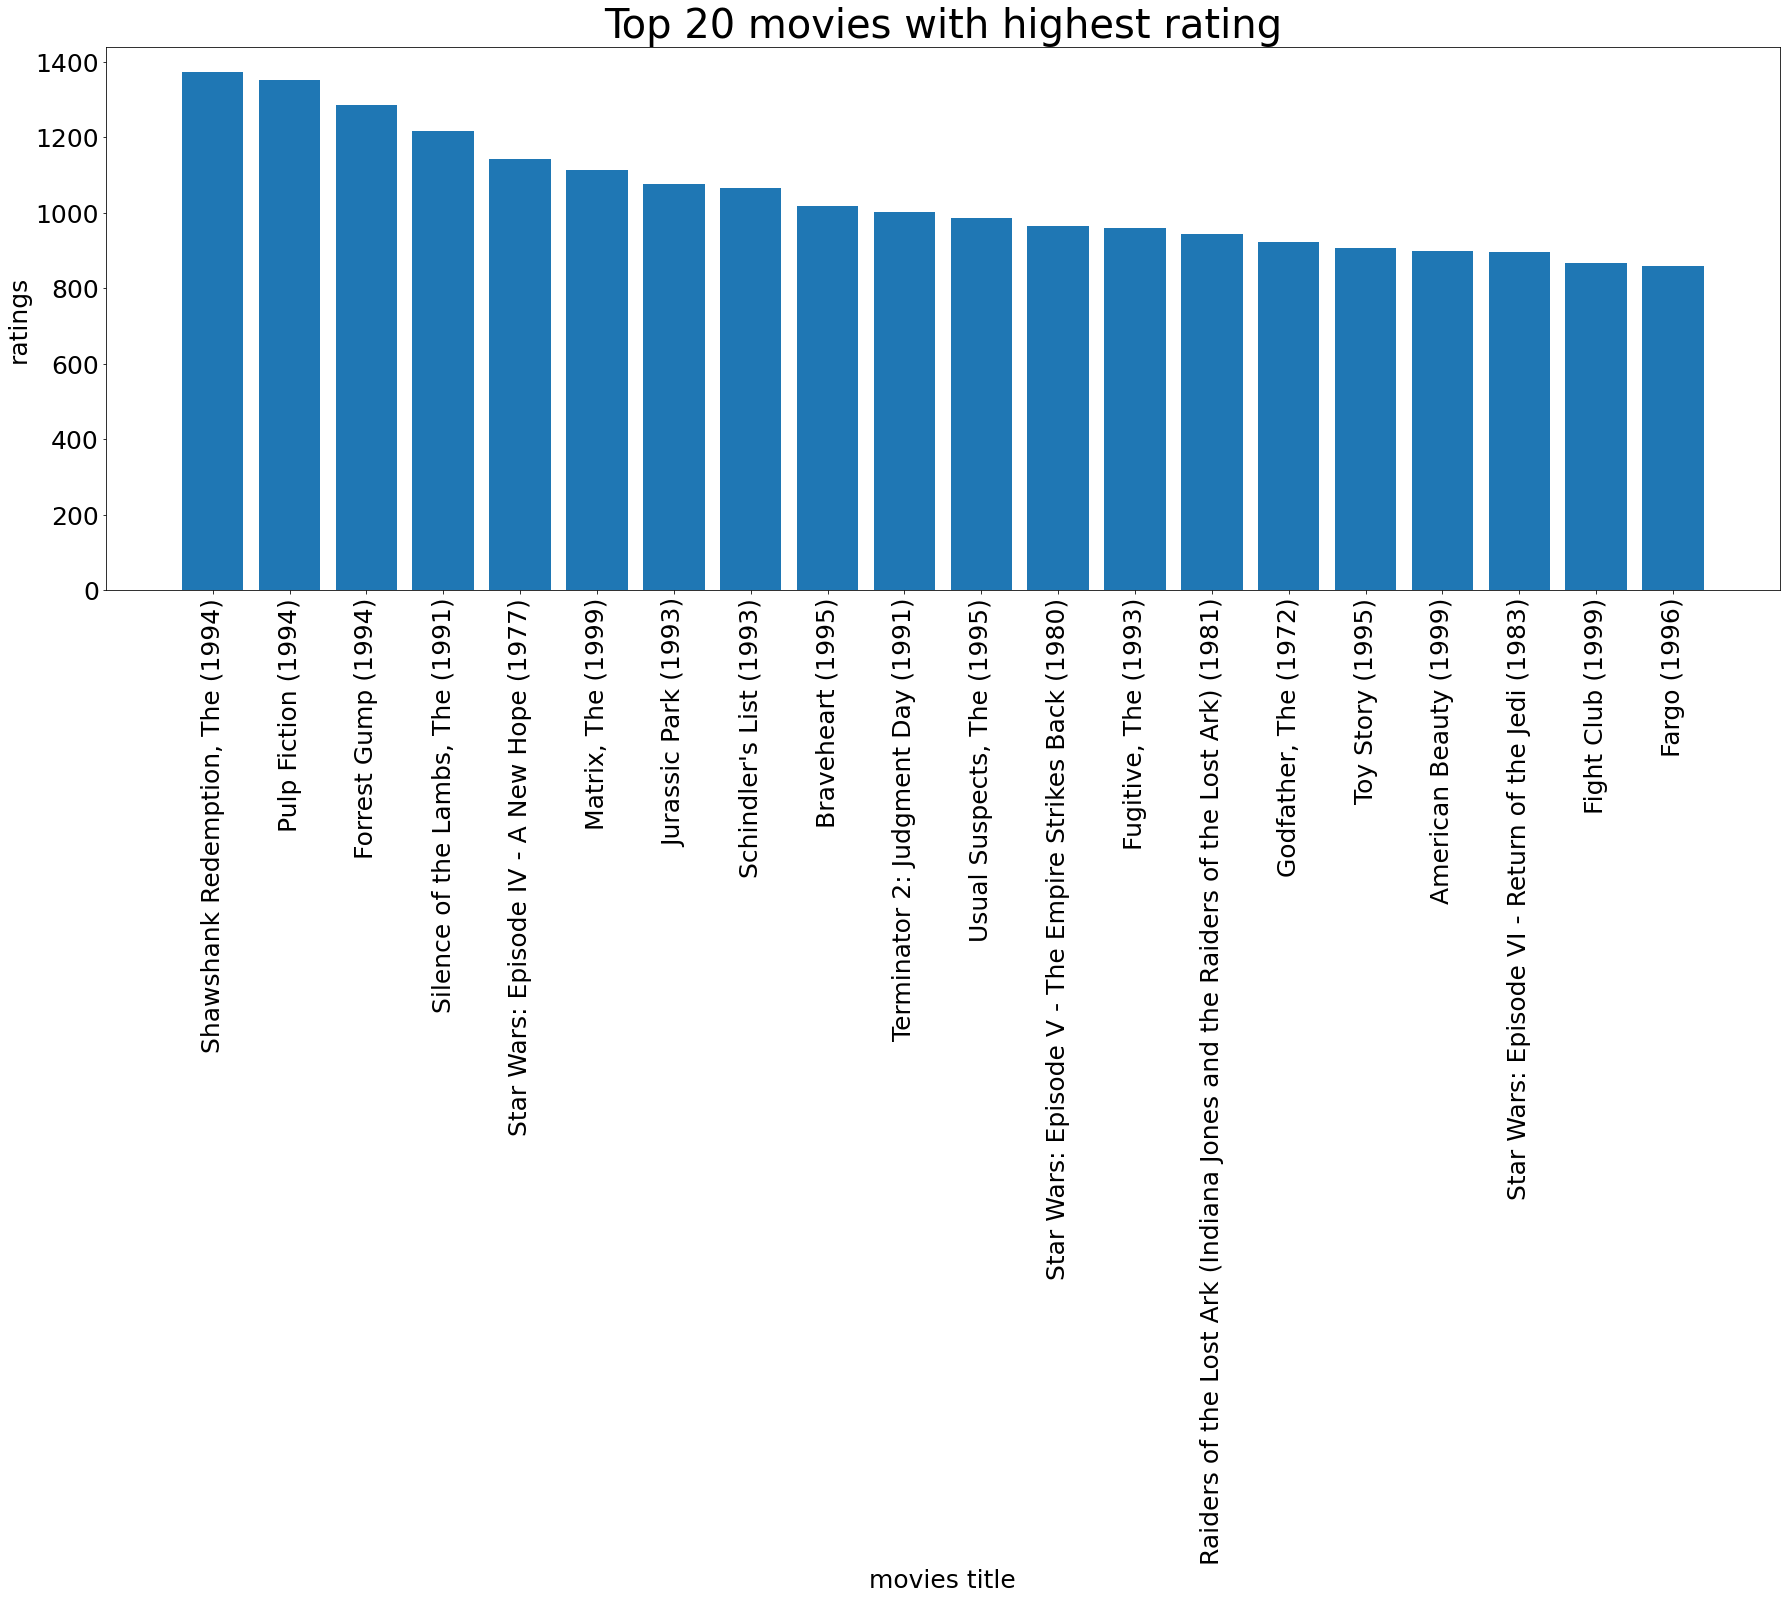

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
plt.ylabel('ratings', fontsize=25)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=25)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3)
plt.show()

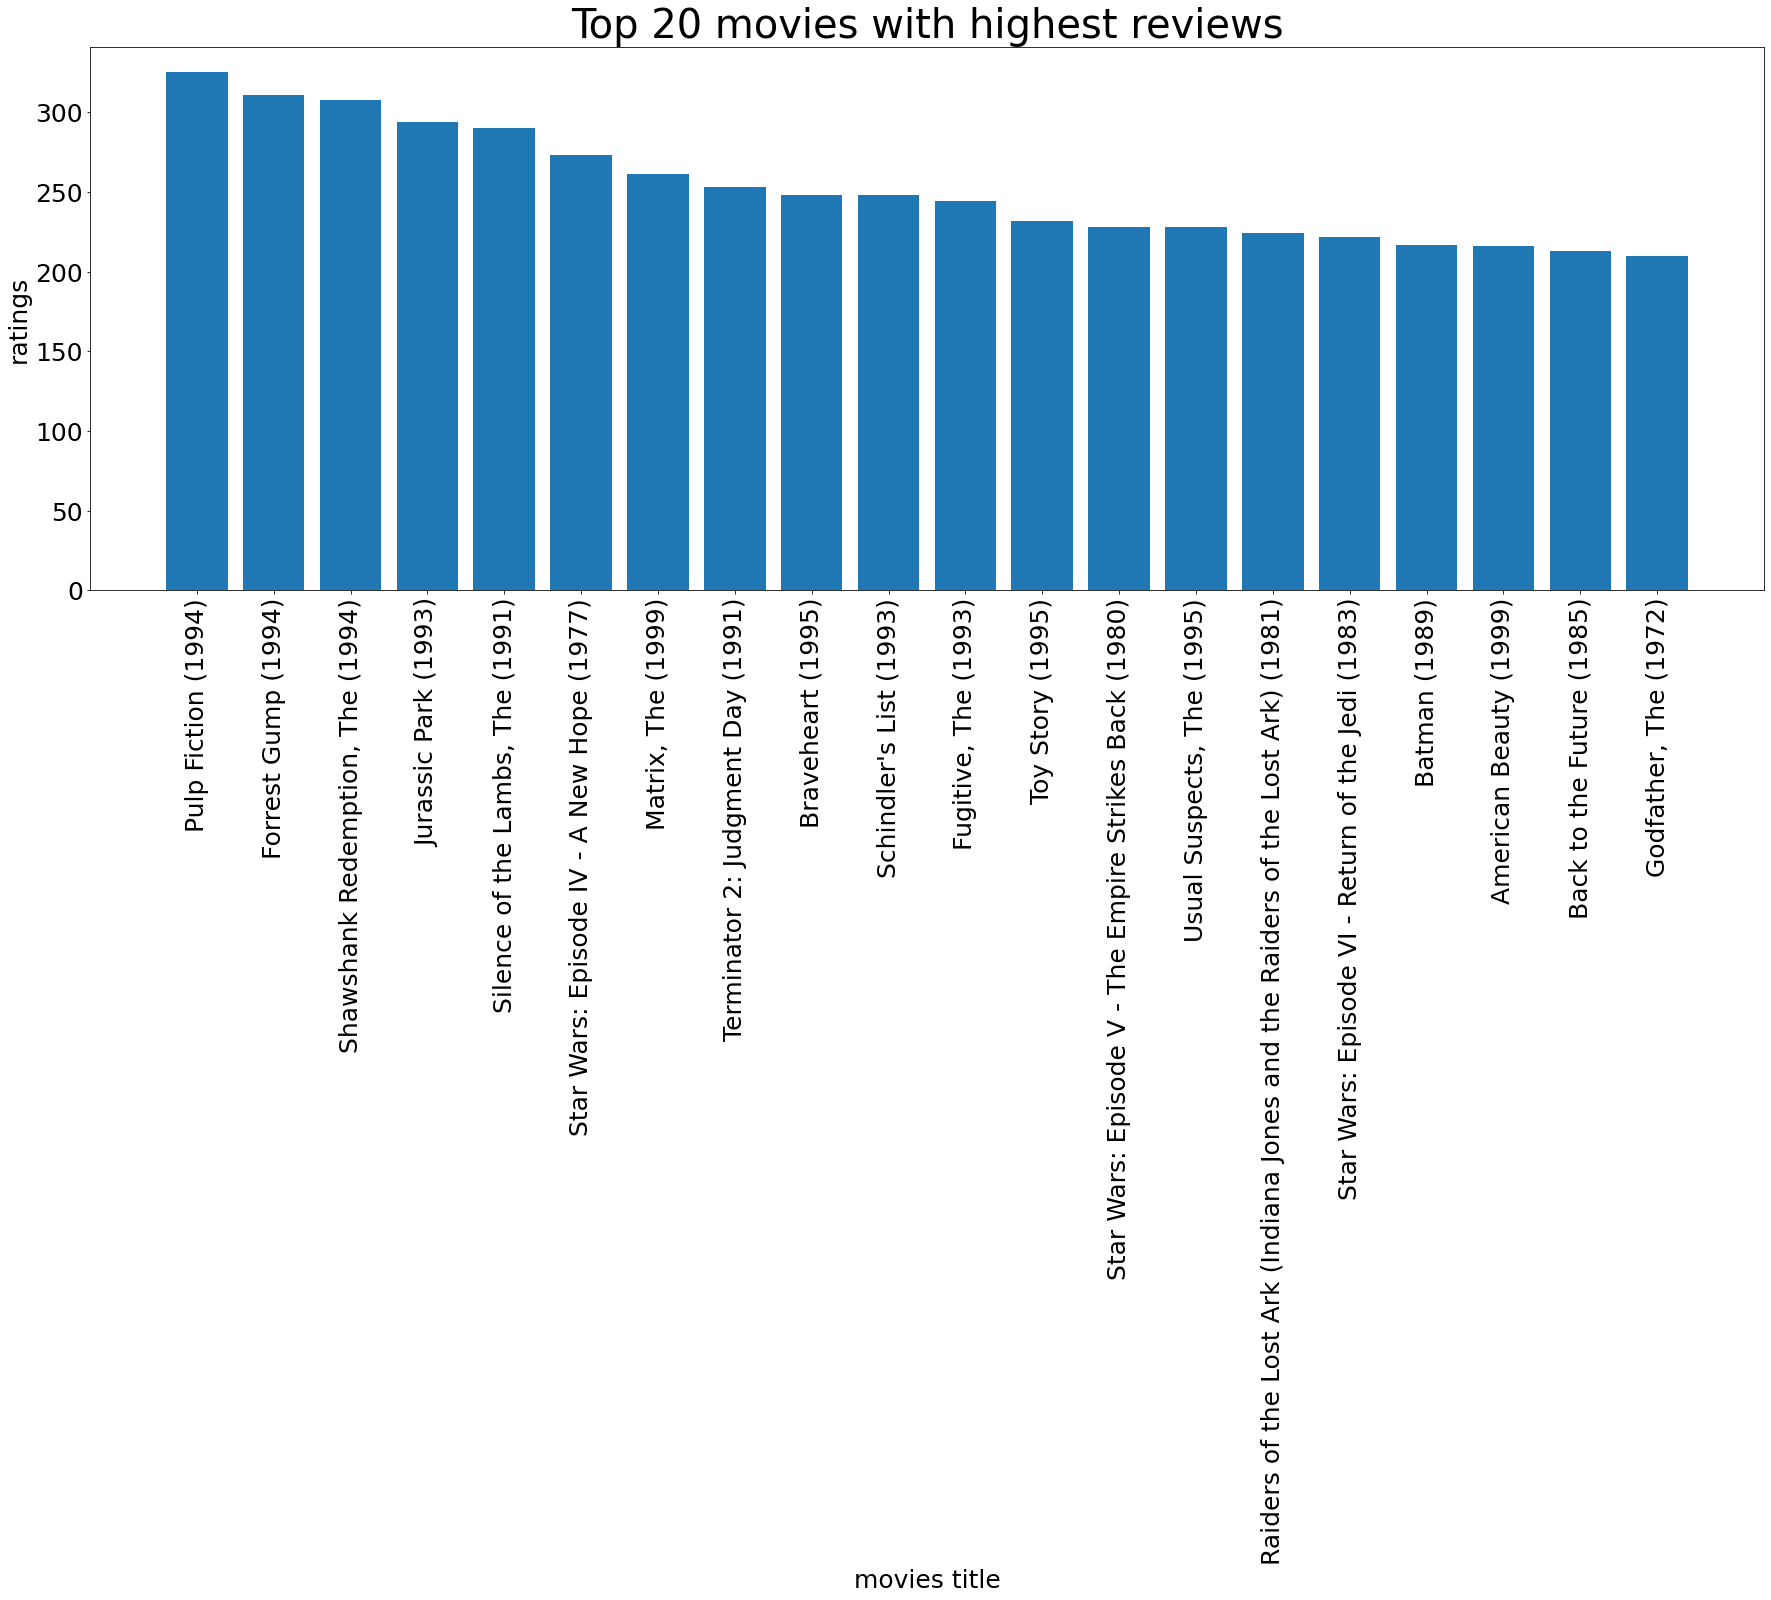

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest reviews',fontsize=40)
plt.ylabel('ratings', fontsize=25)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=25)
plt.yticks(fontsize=25)
plt.bar(high_reviews.index,high_reviews['Num Reviews'],linewidth=3)
plt.show()

In [ ]:
g= movie_data['genres'].str.split('|', expand=True)

In [ ]:
g['title']= movie_data['title']

In [ ]:
avg_rating=pd.merge(avg_rating, g, how='right',on='title')
avg_rating

,title,Avg Rating,Num Reviews,0,1,2,3,4,5,6,7,8,9
0,Toy Story (1995),906.5,232.0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Jumanji (1995),308.5,92.0,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Grumpier Old Men (1995),185.0,58.0,Comedy,Romance,None,None,None,None,None,None,None,None
3,Waiting to Exhale (1995),31.0,11.0,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Father of the Bride Part II (1995),201.5,62.0,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,Cosmic Scrat-tastrophe (2015),4.0,1.0,Animation,Children,Comedy,None,None,None,None,None,None,None
10325,Le Grand Restaurant (1966),2.5,1.0,Comedy,None,None,None,None,None,None,None,None,None
10326,A Very Murray Christmas (2015),3.0,1.0,Comedy,None,None,None,None,None,None,None,None,None
10327,The Big Short (2015),13.0,3.0,Drama,None,None,None,None,None,None,None,None,None


In [ ]:
avg_rating.rename(columns = {0:'Genre0', 1:'Genre1',2:'Genre2', 3:'Genre3',4:'Genre4', 5:'Genre5',6:'Genre6', 7:'Genre7',8:'Genre8', 9:'Genre9'}, inplace = True)

In [ ]:
avg_rating

,title,Avg Rating,Num Reviews,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9
0,Toy Story (1995),906.5,232.0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Jumanji (1995),308.5,92.0,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Grumpier Old Men (1995),185.0,58.0,Comedy,Romance,None,None,None,None,None,None,None,None
3,Waiting to Exhale (1995),31.0,11.0,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Father of the Bride Part II (1995),201.5,62.0,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,Cosmic Scrat-tastrophe (2015),4.0,1.0,Animation,Children,Comedy,None,None,None,None,None,None,None
10325,Le Grand Restaurant (1966),2.5,1.0,Comedy,None,None,None,None,None,None,None,None,None
10326,A Very Murray Christmas (2015),3.0,1.0,Comedy,None,None,None,None,None,None,None,None,None
10327,The Big Short (2015),13.0,3.0,Drama,None,None,None,None,None,None,None,None,None


In [ ]:
G = db['Genre'][0]
t =db['t'][0]
n = db['n'][0]


In [ ]:
R1 = avg_rating[((avg_rating['Genre0']== G) | (avg_rating['Genre1']==G) | (avg_rating['Genre2']==G) | (avg_rating['Genre3']==G) |(avg_rating['Genre4']==G) | (avg_rating['Genre5']==G) |(avg_rating['Genre6']==G) | (avg_rating['Genre7']==G)| (avg_rating['Genre8']==G)|(avg_rating['Genre9']==G) ) & (avg_rating['Num Reviews']>t)].sort_values(by ='Avg Rating',ascending=False).head(n)
R1

,title,Avg Rating,Num Reviews,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9
260,Pulp Fiction (1994),1352.0,325.0,Comedy,Crime,Drama,Thriller,None,None,None,None,None,None
316,Forrest Gump (1994),1287.0,311.0,Comedy,Drama,Romance,War,None,None,None,None,None,None
0,Toy Story (1995),906.5,232.0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
537,Fargo (1996),858.5,201.0,Comedy,Crime,Drama,Thriller,None,None,None,None,None,None
1029,Back to the Future (1985),840.0,213.0,Adventure,Comedy,Sci-Fi,None,None,None,None,None,None,None


In [ ]:
R1 = R1[['title','Avg Rating','Num Reviews']]
R1 = R1.reset_index(drop=True)
R1.index = R1.index + 1
R1.head(n)

,title,Avg Rating,Num Reviews
1,Pulp Fiction (1994),1352.0,325.0
2,Forrest Gump (1994),1287.0,311.0
3,Toy Story (1995),906.5,232.0
4,Fargo (1996),858.5,201.0
5,Back to the Future (1985),840.0,213.0
